In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from config import my_sql_password

In [3]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:'+ my_sql_password + '@localhost:5432/homework')
connection = engine.connect()

## <span style="color:blue"> Create a histogram to visualize the most common salary ranges for employees.</span>

In [34]:
SQL_Query = pd.read_sql_query(
'''SELECT emp_no,salary
FROM salaries''', connection)

In [35]:
df = pd.DataFrame(SQL_Query, columns=['emp_no','salary'])

In [36]:
df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


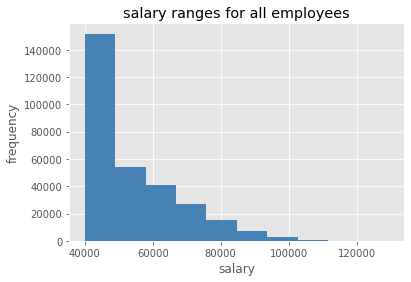

In [38]:
plt.style.use('ggplot')
plt.hist(df['salary'],color='steelblue')
plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('salary ranges for all employees')
plt.show()

## <span style="color:blue"> Create a bar chart of average salary by title.</span>

In [25]:
SQL_Query = pd.read_sql_query(
'''SELECT t.title,ROUND(AVG(s.salary),2) AS avg_salary
FROM salaries AS s
JOIN employees AS e
ON s.emp_no = e.emp_no
JOIN titles AS t
ON e.emp_title_id = t.title_id
GROUP BY t.title
''', connection)

In [26]:
df = pd.DataFrame(SQL_Query, columns=['title','avg_salary'])

In [27]:
df

,title,avg_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


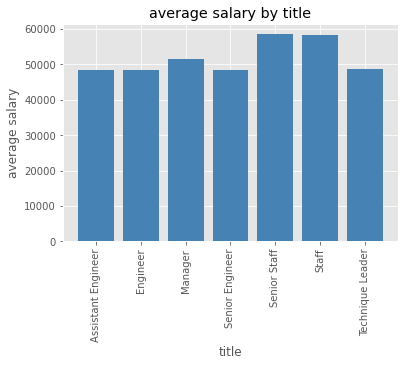

In [32]:
plt.style.use('ggplot')
plt.bar(df['title'],df['avg_salary'],color = 'steelblue')
plt.xlabel('title')
plt.ylabel('average salary')
plt.title('average salary by title')
plt.xticks(rotation=90)
plt.show()

### <span style="color:red"> Wait! The average salary is comparable among all titles, but in reality salary range should be different based on the title rank.</span>

In [39]:
SQL_Query1 = pd.read_sql_query(
'''SELECT * FROM employees WHERE emp_no = 499942
''', connection)
SQL_Query2 = pd.read_sql_query(
'''SELECT salary FROM salaries WHERE emp_no = 499942
''', connection)

df1 = pd.DataFrame(SQL_Query1)
df2 = pd.DataFrame(SQL_Query2)

In [40]:
df1

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997


In [41]:
df2

,salary
0,40000


### Happy April Fools Day!